In [501]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.layers import Conv1D, Dense, Dropout, Input, Concatenate, GlobalMaxPooling1D, MaxPooling1D, Flatten
from keras.models import Model, Sequential

In [502]:
realData = np.load('C:\\Users\\dylin\\Documents\\BA_Glare_Effect\\classification_data\\real\\realData.npy')
X_realData = np.load('C:\\Users\\dylin\\Documents\\BA_Glare_Effect\\classification_data\\real\\X_realData.npy')
y_realData = np.load('C:\\Users\\dylin\\Documents\\BA_Glare_Effect\\classification_data\\real\\y_realData.npy')

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X_realData, y_realData, test_size=0.4, random_state=42)

In [504]:
X_train[:3]

array([[[ 1.1, 14. , 13. ,  1. ,  0. ],
        [ 2.1, 14. , 12. ,  1. ,  0. ],
        [ 3.1, 14. , 11. ,  1. ,  0. ],
        [ 4.1, 14. , 10. ,  1. ,  0. ],
        [ 3.1, 14. , 10. ,  2. ,  0. ],
        [ 5.1, 14. ,  9. ,  2. ,  0. ],
        [ 6.1, 14. ,  8. ,  2. ,  0. ],
        [ 7.1, 14. ,  7. ,  2. ,  0. ],
        [ 7.2, 14. ,  6. ,  2. ,  0. ],
        [ 7.1, 12. ,  6. ,  2. ,  0. ],
        [ 1.2, 12. ,  5. ,  2. ,  0. ],
        [ 1.1, 10. ,  5. ,  2. ,  0. ],
        [ 3.2, 10. ,  4. ,  2. ,  0. ],
        [ 4.1, 10. ,  4. ,  2. ,  0. ],
        [ 3.1, 10. ,  4. ,  3. ,  0. ],
        [ 4.2, 10. ,  3. ,  3. ,  0. ],
        [ 4.1, 10. ,  3. ,  3. ,  0. ],
        [ 4.2,  8. ,  3. ,  3. ,  0. ],
        [ 6.2,  8. ,  2. ,  3. ,  0. ],
        [ 5.2,  8. ,  1. ,  3. ,  0. ],
        [ 3.1,  8. ,  1. ,  4. ,  0. ],
        [ 6.2,  8. ,  1. ,  4. ,  0. ],
        [ 5.1,  8. ,  1. ,  4. ,  0. ],
        [ 3.2,  8. ,  1. ,  4. ,  0. ],
        [ 6.1,  8. ,  1. ,  4. ,  0. ],


In [505]:
X_test[:3]

array([[[ 1.1, 14. , 13. ,  1. ,  0. ],
        [ 2.1, 14. , 12. ,  1. ,  0. ],
        [ 3.1, 14. , 11. ,  1. ,  0. ],
        [ 4.1, 14. , 10. ,  1. ,  0. ],
        [ 2.2, 14. ,  9. ,  1. ,  0. ],
        [ 2.1, 12. ,  9. ,  2. ,  0. ],
        [ 3.2, 12. ,  8. ,  2. ,  0. ],
        [ 3.1, 10. ,  8. ,  2. ,  0. ],
        [ 5.1, 10. ,  7. ,  2. ,  0. ],
        [ 6.1, 10. ,  6. ,  2. ,  0. ],
        [ 7.1, 10. ,  5. ,  2. ,  0. ],
        [ 6.2, 10. ,  4. ,  2. ,  0. ],
        [ 6.1, 10. ,  4. ,  2. ,  0. ],
        [ 6.2,  8. ,  4. ,  2. ,  0. ],
        [ 5.2,  8. ,  3. ,  2. ,  0. ],
        [ 4.2,  8. ,  2. ,  2. ,  0. ],
        [ 4.1,  8. ,  2. ,  2. ,  0. ],
        [ 4.2,  6. ,  2. ,  2. ,  0. ],
        [ 1.1,  6. ,  2. ,  2. ,  0. ],
        [ 1.2,  4. ,  1. ,  2. ,  0. ],
        [ 7.2,  4. ,  0. ,  2. ,  0. ],
        [ 7.1,  2. ,  0. ,  2. ,  0. ],
        [ 5.2,  2. ,  0. ,  2. ,  0. ],
        [ 5.1,  0. ,  0. ,  2. ,  0. ],
        [ 0. ,  0. ,  0. ,  2. ,  1. ],


In [506]:
y_train[:3]

array([[0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [507]:
y_test[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [508]:
X_train.shape

(24, 40, 5)

In [509]:
X_test.shape

(16, 40, 5)

In [510]:
y_train.shape

(24, 2)

In [511]:
y_test.shape

(16, 2)

In [512]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

In [513]:
verbose, epochs, batch_size = 0, 150, 32
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, 
                    shuffle=True, validation_data=(X_test, y_test))
_, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

In [514]:
accuracy

0.875

In [515]:
model.predict_classes(X_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [516]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [517]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

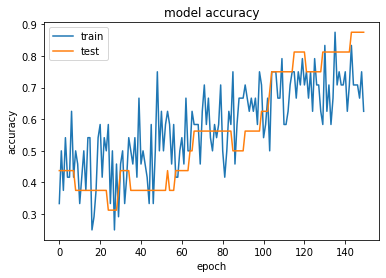

In [518]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()